# Tarea 4.3 Feature Hashing
Carga de librerias

In [45]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
df = pd.read_csv('resenna.csv')

In [9]:
df

,CAUSA
0,Vacio
1,Vacio
2,Vacio
3,Vacio
4,Vacio
...,...
1102,Vacio
1103,Calefacción alta y refrigeración pobre en varano
1104,Vacio
1105,La BPM Vicálvaro necesita una reforma de calad...


Se retira la palabra vacio ya que no aporta mas que ruido en el analisis

In [58]:
df = df.loc[(df.CAUSA != "Vacio")]
df

,CAUSA
5,Hace mucho calor en la sala de lectura y entra...
7,Unos días hace mucho frio y no se puede estar ...
8,Cuando ponen la calefación hace mucho calor y ...
10,"Hace demasiado calor en invierno y verano, imp..."
16,Temperatura en la sala de estudio excesivament...
...,...
1091,Ahora no está puesto el aire (en verano).
1094,Me gustaría que el horario de tarde se amplias...
1095,Más refrigeración en algunos días calurosos.
1103,Calefacción alta y refrigeración pobre en varano


Se crean los vectores eliminando los stopwords

In [59]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=stopwords.words("spanish"),
    ngram_range=(1, 2))
vectorizer

TfidfVectorizer(ngram_range=(1, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [60]:
vectorizer.fit(df['CAUSA'])

TfidfVectorizer(ngram_range=(1, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

Se crea el vector de palabras

In [61]:
X = vectorizer.transform(df['CAUSA'])
X

<198x2438 sparse matrix of type '<class 'numpy.float64'>'
	with 3459 stored elements in Compressed Sparse Row format>

In [62]:
tfidf = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
tfidf

,10,10 debido,10 experiencia,19,19 hace,20,2007,2007 cáceres,27,27 28,...,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ágil,ángel,ángel bibliotecarios,época,época refrigeración
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se suman para ver la importancia

In [79]:
saved = pd.DataFrame(tfidf.sum(axis=0),columns=['sum']).sort_values(by = 'sum',ascending=False)
saved

,sum
calor,11.214880
hace,7.964617
funciona,6.502308
invierno,5.169312
verano,4.991354
...,...
pequeño aglutinan,0.082390
pequeña sala,0.082390
buscar consultar,0.082390
atravesar,0.082390


In [89]:
saved['sum'].sum()

720.2799057859077

In [84]:
n = len(saved)
n

2438

In [94]:
cs = saved['sum'].cumsum()
csplot = cs.loc[cs < saved['sum'].sum()*0.2]
csplot

calor                  11.214880
hace                   19.179498
funciona               25.681806
invierno               30.851118
verano                 35.842472
hace calor             40.565336
frío                   44.928658
frio                   49.291819
demasiado              53.143317
sala                   56.932958
aire                   60.534634
refrigeración          63.827072
falta                  67.079208
biblioteca             70.204489
calor verano           73.184182
luz                    76.071625
hace frio              78.947543
calefacción            81.778454
demasiado calor        84.572832
lectura                87.357998
siempre                90.049307
iluminación            92.669561
nunca                  95.211691
calor invierno         97.532414
sala lectura           99.746063
nunca funciona        101.939769
calor frío            104.048028
climatización         106.113663
wifi                  108.099260
edificio              109.988877
acondicion

Se grafican las palabras que aportan el 80%

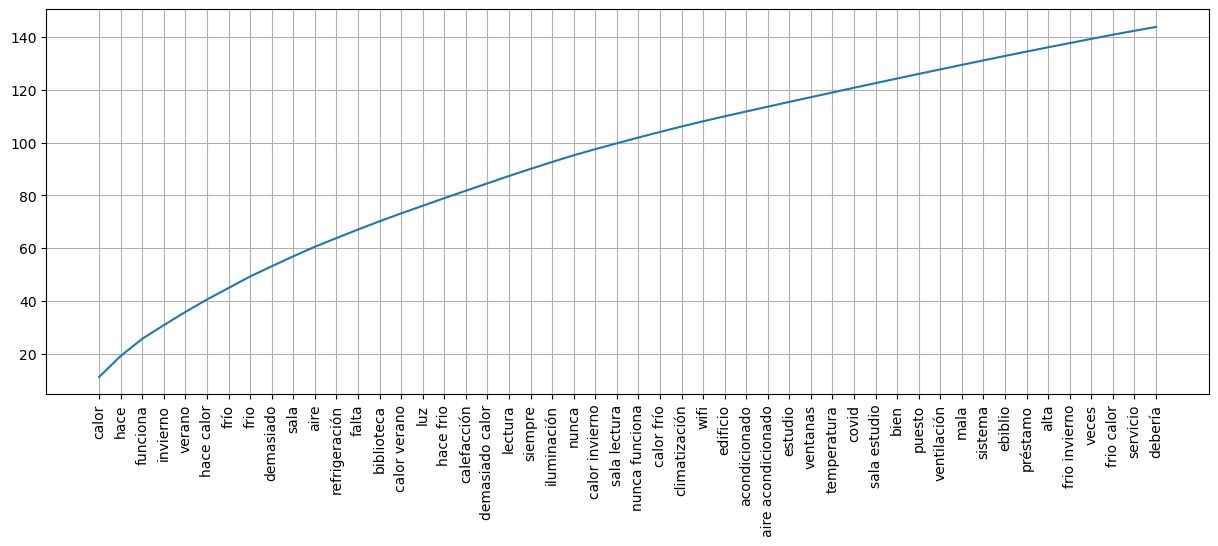

In [99]:
csplot.plot(grid=True,figsize=(15,5))
t = plt.xticks(range(len(csplot)),csplot.index,rotation = 90)

In [126]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(tfidf[csplot.index])
# store cluster labels in a variable
clusters = kmeans.labels_
clusters

array([0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       3, 0, 0, 1, 0, 3, 0, 3, 0, 2, 3, 1, 2, 3, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 3, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0])

Se ajustan los clusters donde el 3 es el que se enfoca en los servicios de la biblioteca
No es facil definir los grupos para los clusters se ven iguales

In [127]:
df['Cluster'] = clusters
df

,CAUSA,Cluster
5,Hace mucho calor en la sala de lectura y entra...,0
7,Unos días hace mucho frio y no se puede estar ...,1
8,Cuando ponen la calefación hace mucho calor y ...,2
10,"Hace demasiado calor en invierno y verano, imp...",1
16,Temperatura en la sala de estudio excesivament...,0
...,...,...
1091,Ahora no está puesto el aire (en verano).,0
1094,Me gustaría que el horario de tarde se amplias...,0
1095,Más refrigeración en algunos días calurosos.,0
1103,Calefacción alta y refrigeración pobre en varano,0


Se procesan los nuevos datos

In [128]:
newdata = ['Hace demasiado calor',
'Poco tiempo de servicio.',
'Falta de personal capacitado.',
'Excelente servicio',
'Falta de enchufes',
'No hay internet',
'Poco espacio para buscar libros',
'El internet falla mucho',
'Falta iluminacion',
'Falta literatura',
'Luz pesima',
'Mucho frio',
'Mucho calor en invierno',
'Calefaccion espantosa',
'Mucho frio en verano',
'Falta de contactos',
'La luz es deficiente',
'Personal maleducado',
'La climatizacion es espantosa',
'Trato desagradable de los empleados',
'Falta de mantenimiento',
'Falta de limpieza']

In [129]:
Xf= vectorizer.transform(newdata)
Xf


<22x2438 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [131]:
tfidfnew = pd.DataFrame(Xf.toarray(), columns=vectorizer.get_feature_names_out())
tfidfnew

,10,10 debido,10 experiencia,19,19 hace,20,2007,2007 cáceres,27,27 28,...,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ágil,ángel,ángel bibliotecarios,época,época refrigeración
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
kmeans.fit(tfidfnew[csplot.index])
# store cluster labels in a variable
clusters = kmeans.labels_
clusters

array([2, 3, 0, 3, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0])

In [138]:
newdata = pd.DataFrame(newdata,columns=['Text'])
newdata['clusters'] = clusters

In [139]:
newdata

,Text,clusters
0,Hace demasiado calor,2
1,Poco tiempo de servicio.,3
2,Falta de personal capacitado.,0
3,Excelente servicio,3
4,Falta de enchufes,0
5,No hay internet,2
6,Poco espacio para buscar libros,2
7,El internet falla mucho,2
8,Falta iluminacion,0
9,Falta literatura,0
